<a href="https://colab.research.google.com/github/keith-keyah/Group_2_project/blob/main/Group_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Crop Yield in Karamoja Region

## Business Understanding
- An NGO seeks to provide technical support as well as farm inputs to the farmers experiencing extremely low yield in the Karamoja region of Uganda.

## Problem Statement
- The NGO lacks visibility into the overall state of the region and often needs to rely on some very local sources of information to prioritize their activities. Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of the NGO

## Objectives
- Total Yield per region
- Crop Type grown per region
- Yield of the different crops per region
- Correlation between population size and yield
- Correlation between allocated land and yield

## Success criteria
- Understanding the areas that have the lowest yields in order for the NGO to prioritize in terms of resource distribution.

## Data Understanding

In [254]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
# Loading the data sets
district_crop_yield = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_crop_yield.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [256]:
subcounty_crop_yield = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [257]:
# Checking the structure of the data sets
district_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


In [258]:
subcounty_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [259]:
# summary of descriptive statistics
district_crop_yield.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


In [260]:
subcounty_crop_yield.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [261]:
# Showing correlation of the numerical columns only and presenting it in a heat map
district_crop_yield.select_dtypes(include='number').corr()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.474371,-0.602633,0.352307,0.696278,0.079865,0.107743,-0.196739,0.132700,-0.078300
POP,-0.474371,1.000000,0.891900,0.024405,-0.032883,0.424930,0.353520,0.562697,0.300750,0.442555
Area,-0.602633,0.891900,1.000000,-0.036377,-0.212716,0.410245,0.310478,0.729935,0.224938,0.574620
S_Yield_Ha,0.352307,0.024405,-0.036377,1.000000,0.565185,0.206778,0.215317,-0.073130,0.370599,0.104401
M_Yield_Ha,0.696278,-0.032883,-0.212716,0.565185,1.000000,0.300017,0.268343,0.212479,0.356662,0.449512
Crop_Area_Ha,0.079865,0.424930,0.410245,0.206778,0.300017,1.000000,0.988370,0.233298,0.952850,0.252674
S_Area_Ha,0.107743,0.353520,0.310478,0.215317,0.268343,0.988370,1.000000,0.083128,0.976447,0.108703
M_Area_Ha,-0.196739,0.562697,0.729935,-0.073130,0.212479,0.233298,0.083128,1.000000,-0.008665,0.946280
S_Prod_Tot,0.132700,0.300750,0.224938,0.370599,0.356662,0.952850,0.976447,-0.008665,1.000000,0.074169
M_Prod_Tot,-0.078300,0.442555,0.574620,0.104401,0.449512,0.252674,0.108703,0.946280,0.074169,1.000000


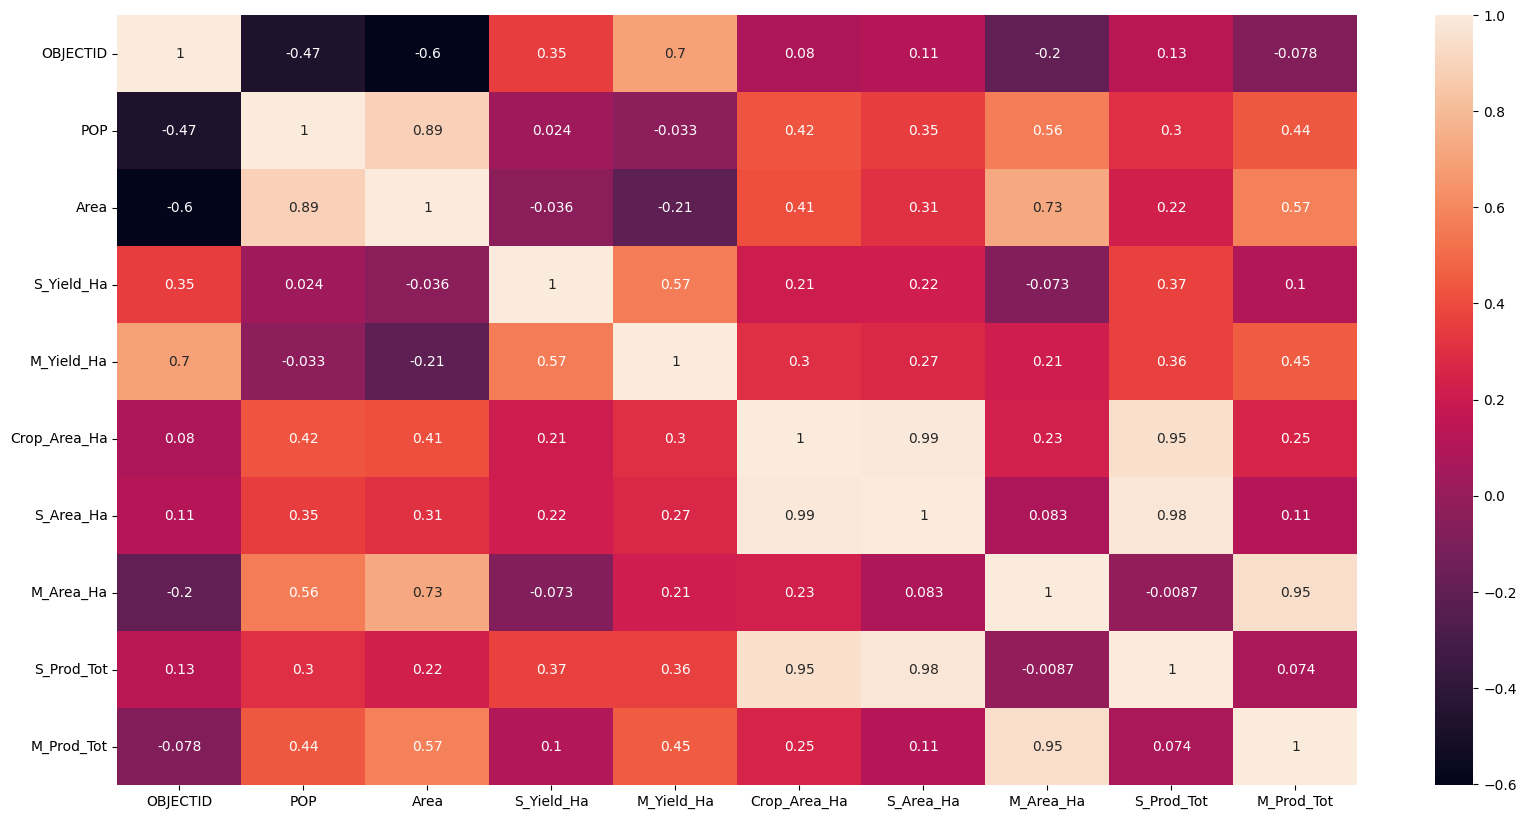

In [262]:
sns.heatmap(district_crop_yield.select_dtypes(include='number').corr(), annot=True)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

In [263]:
subcounty_crop_yield.select_dtypes(include='number').corr()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.413025,0.153613,-0.224381,-0.284216,-0.407773,-0.455794,0.135549,-0.528434,0.117310
POP,-0.413025,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350
Area,0.153613,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690
S_Yield_Ha,-0.224381,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797
M_Yield_Ha,-0.284216,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450
Crop_Area_Ha,-0.407773,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030
S_Area_Ha,-0.455794,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947
M_Area_Ha,0.135549,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444
S_Prod_Tot,-0.528434,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794
M_Prod_Tot,0.117310,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000


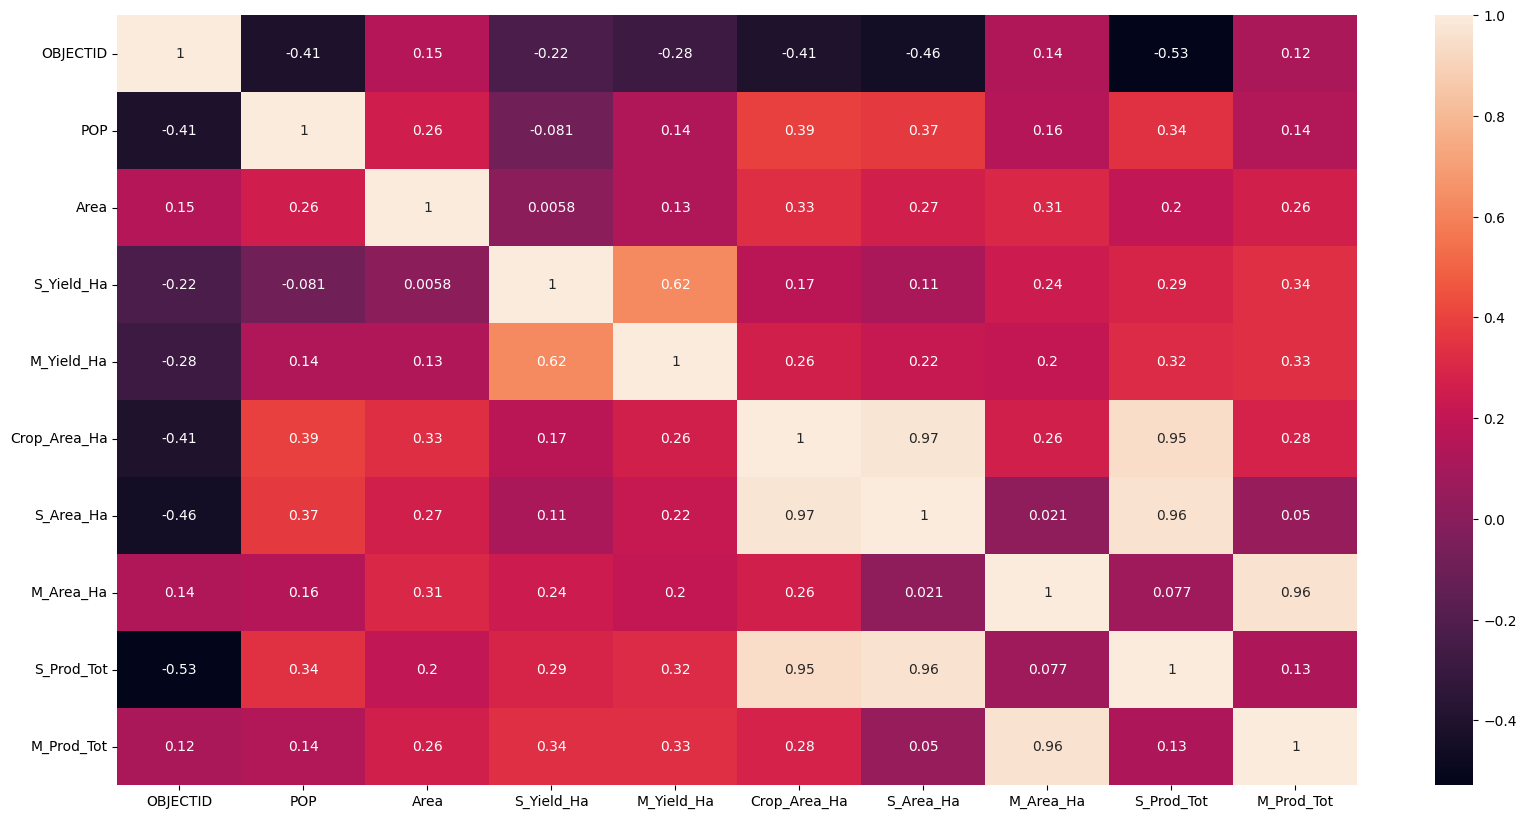

In [264]:
sns.heatmap(subcounty_crop_yield.select_dtypes(include='number').corr(), annot=True)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

## Data Cleaning

In [265]:
# checking for null values
district_crop_yield.isna().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [266]:
subcounty_crop_yield.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0



No null values found in both data sets

In [267]:
# Checking columns before EDA
district_crop_yield.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [268]:
subcounty_crop_yield.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [269]:
# Renaming the district columns under a common name to enable data blending in Tableau
district_crop_yield = district_crop_yield.rename(columns={'NAME':'DISTRICT_NAME'})
district_crop_yield.head()

,OBJECTID,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [270]:
# creating new fields to show total production per district and sub-county

In [271]:
district_crop_yield['Total_Yield'] = district_crop_yield['M_Prod_Tot'] + district_crop_yield['S_Prod_Tot']
district_crop_yield.head()

,OBJECTID,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,3394073
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,4155110
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,12719553
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,18642479
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,1029412


In [272]:
subcounty_crop_yield['Total_Yield'] = subcounty_crop_yield['M_Prod_Tot'] + subcounty_crop_yield['S_Prod_Tot']
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,2.879816e+06
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,5.541496e+06
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,5.714680e+05
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,1.954668e+06
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,4.001549e+06


In [273]:
# Checking for duplicates: District data
district_crop_yield.duplicated().sum()


np.int64(0)

In [274]:
#Checking for duplicates: Sub-county data
subcounty_crop_yield.duplicated().sum()

np.int64(0)

## EDA - Exploratory data analysis

## Key Findings

## Conclusions

## Recommendations/Next Steps

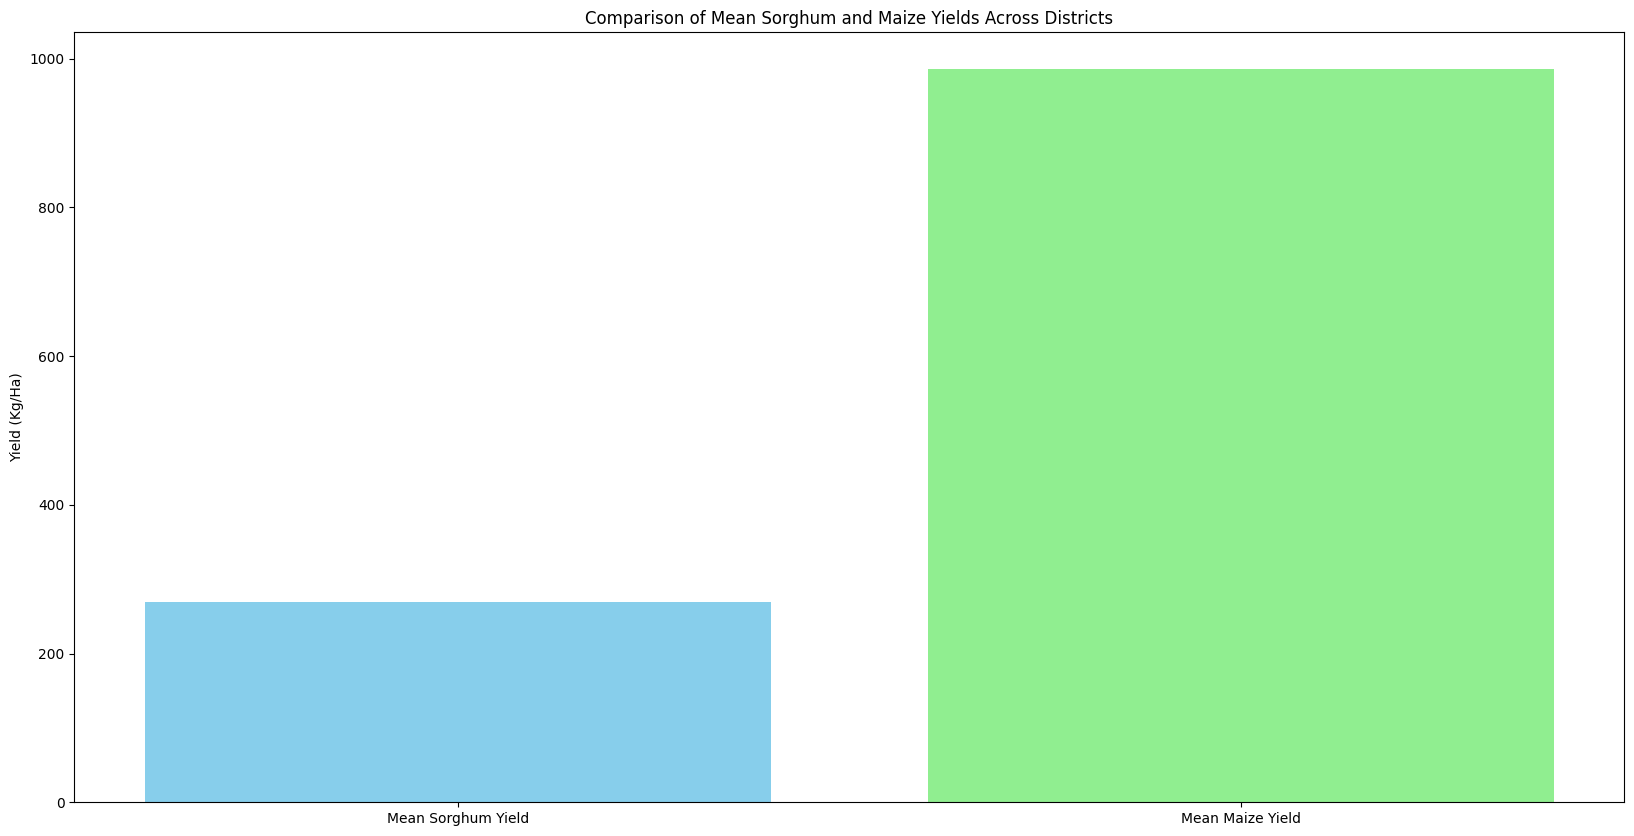

In [275]:
# Create a bar chart to compare mean maize and sorghum yields for district yield
mean_S_Yield_dist = district_crop_yield['S_Yield_Ha'].mean()
mean_M_Yield_dist = district_crop_yield['M_Yield_Ha'].mean()

labels = ['Mean Sorghum Yield', 'Mean Maize Yield']
means = [mean_S_Yield_dist, mean_M_Yield_dist]

plt.bar(labels, means, color=['skyblue', 'lightgreen'])
plt.ylabel('Yield (Kg/Ha)')
plt.title('Comparison of Mean Sorghum and Maize Yields Across Districts')
plt.show()

# **QUESTION**:DOES *A HIGHER POPULATION LEAD TO A HIGHER CROP YIELD IN AN AREA*
the below strings of code help us find the solution to this question.

We are going to work on comparing the mean total district yields to the mean total population in order to come up with a sound conclusion.






In [276]:
#mean district population
mean_dist_population = district_crop_yield['POP'].mean()
mean_dist_population

np.float64(214943.57142857142)

In [277]:
#total yields
district_crop_yield['total_yields'] = district_crop_yield['S_Yield_Ha'] + district_crop_yield['M_Yield_Ha']
district_crop_yield['total_yields']

,total_yields
0,1489
1,1502
2,1224
3,1479
4,483
5,1620
6,991


In [278]:
#mean total crop yields
district_crop_yield['total_yields'] = district_crop_yield['S_Yield_Ha'] + district_crop_yield['M_Yield_Ha']
district_crop_yield['total_yields'].mean()

np.float64(1255.4285714285713)

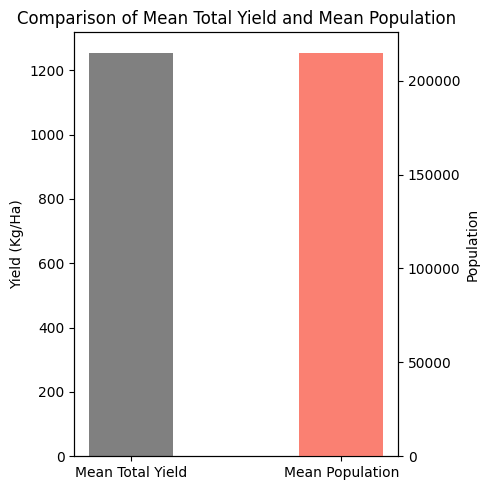

In [279]:
#bar graph comparing the mean total yield against the mean population
fig, ax1 = plt.subplots(figsize=(5, 5))

labels = ['Mean Total Yield', 'Mean Population']
means_yield = [district_crop_yield['total_yields'].mean()]
means_pop = [mean_dist_population]


# Bar chart for mean total yield on the left y-axis
rects1 = ax1.bar(labels[0], means_yield, color='grey', width=0.4)
ax1.set_ylabel('Yield (Kg/Ha)')
ax1.set_title('Comparison of Mean Total Yield and Mean Population')
ax1.tick_params(axis='y')


# Create a second y-axis for mean population
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_pop, color='salmon', width=0.4)
ax2.set_ylabel('Population')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

In [280]:
corr_pop_v_totalyields=np.corrcoef(district_crop_yield['POP'],district_crop_yield['total_yields'],)
corr_pop_v_totalyields[0,1]

np.float64(-0.01910193423287373)

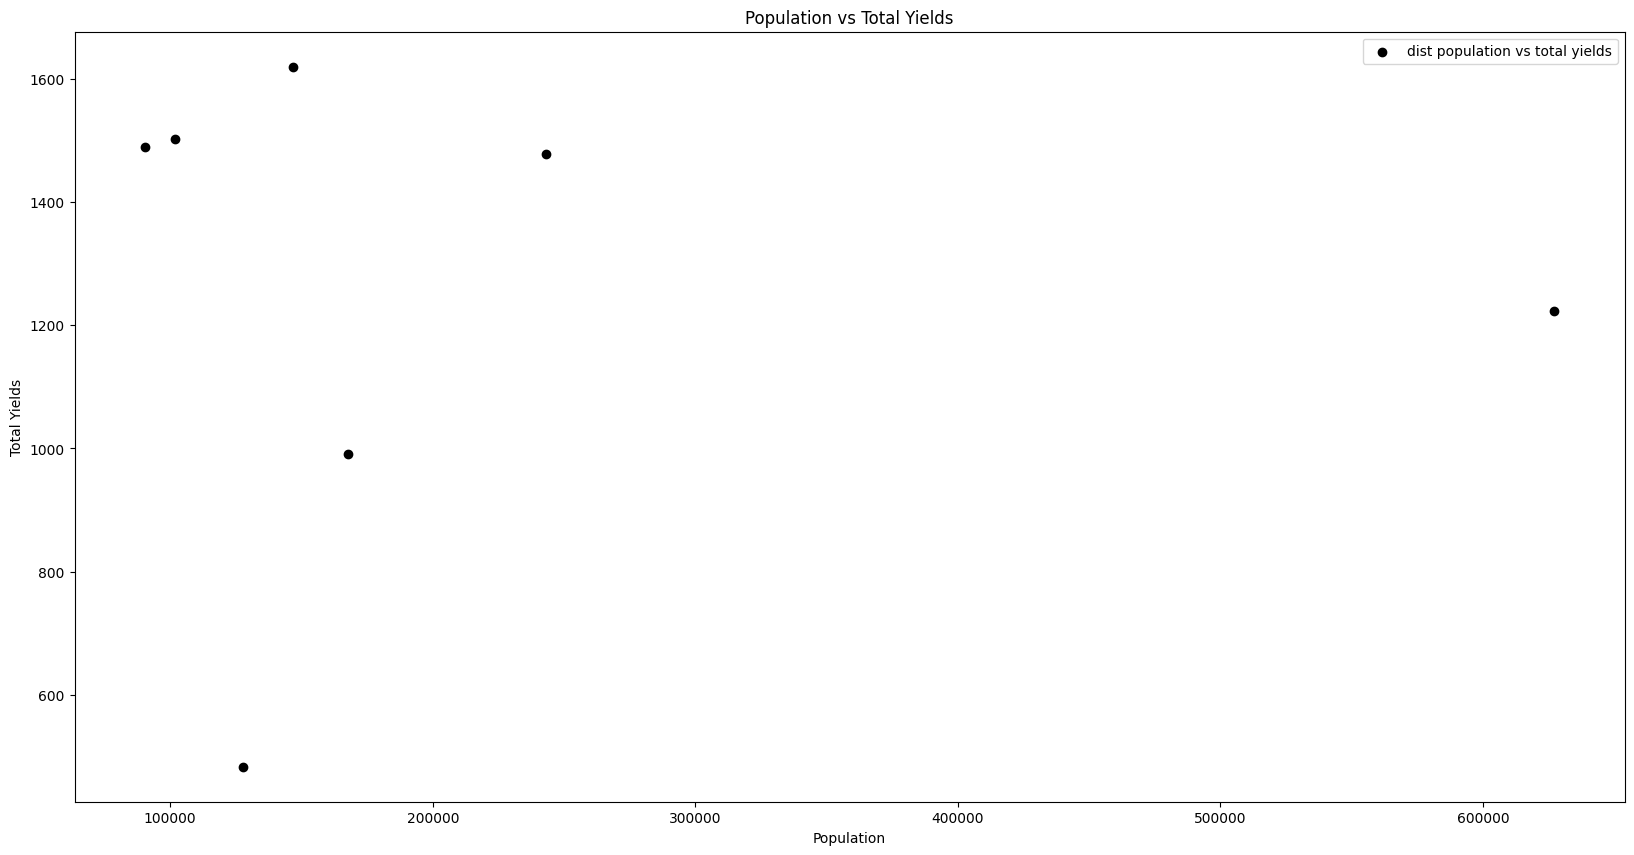

In [281]:
#scatter plot showing the correlation of population density against total yields
label='dist population vs total yields'
plt.scatter(district_crop_yield['POP'],district_crop_yield['total_yields'],color='black', label=label)
plt.xlabel('Population')
plt.ylabel('Total Yields')
plt.title('Population vs Total Yields')
plt.legend()
plt.show()

## **CONCLUSION**
A higher population concentration in an area does not, in fact, lead to a higher count of crop yields in said area, even though they may seem highly related when using a bar graph.








# HOW DOES THE AMOUNT OF LAND ALLOCATED TO CROP GROWTH IMPACT INTEGRAL QUANTITY OF CROP YIELDS IN THE DISTRICTS.
Here we will come up with three visualisations comparing:


* maize yields against maize area per hectares
* sougham yields against sougham area per hectares
* total yields against total crop area per hectares






In [282]:
#mean of sougham area per hectare district-wise
mean_sougham_area= district_crop_yield['S_Area_Ha'].mean()
mean_sougham_area

np.float64(16737.636651)

In [283]:
#mean of maize area per hectare district-wise
mean_maizearea = district_crop_yield['M_Area_Ha'].mean()
mean_maizearea

np.float64(3983.9470818571426)

In [284]:
#finding the total crop area
district_crop_yield['total_crop_area']=district_crop_yield['S_Area_Ha']+district_crop_yield['M_Area_Ha']
total_dist_cropyield = district_crop_yield['total_crop_area']
total_dist_cropyield

,total_crop_area
0,5125.917826
1,5707.084874
2,27938.611294
3,51998.816184
4,5931.799382
5,25663.121624
6,22685.734946


In [285]:
#mean of the total crop area
mean_tca= district_crop_yield['total_crop_area'].mean()
mean_tca

np.float64(20721.583732857143)

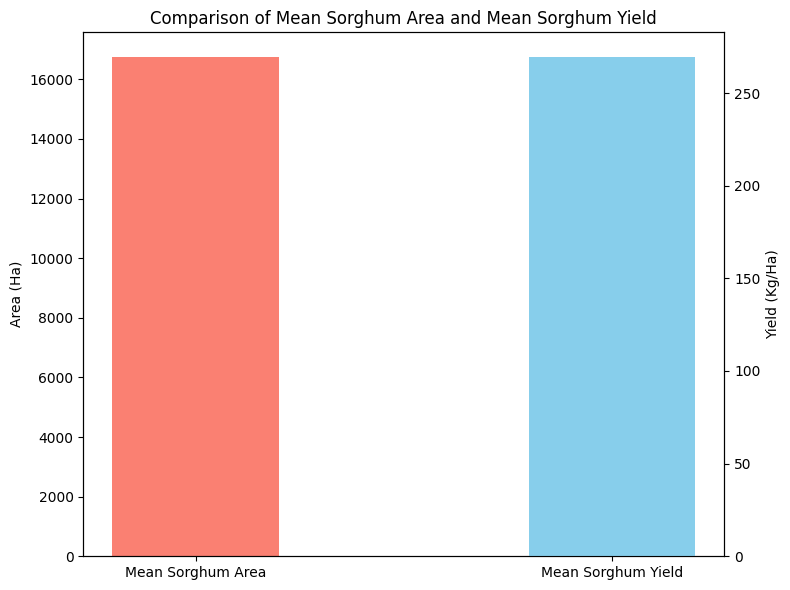

In [286]:
fig, ax1 = plt.subplots(figsize=(8, 6))

labels = ['Mean Sorghum Area', 'Mean Sorghum Yield']
means_area = [mean_sougham_area]
means_yield = [mean_S_Yield_dist]

# Bar chart for mean sorghum area on the left y-axis
rects1 = ax1.bar(labels[0], means_area, color='salmon', width=0.4)
ax1.set_ylabel('Area (Ha)')
ax1.set_title('Comparison of Mean Sorghum Area and Mean Sorghum Yield')
ax1.tick_params(axis='y')

# Create a second y-axis for mean sorghum yield
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_yield, color='skyblue', width=0.4)
ax2.set_ylabel('Yield (Kg/Ha)')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

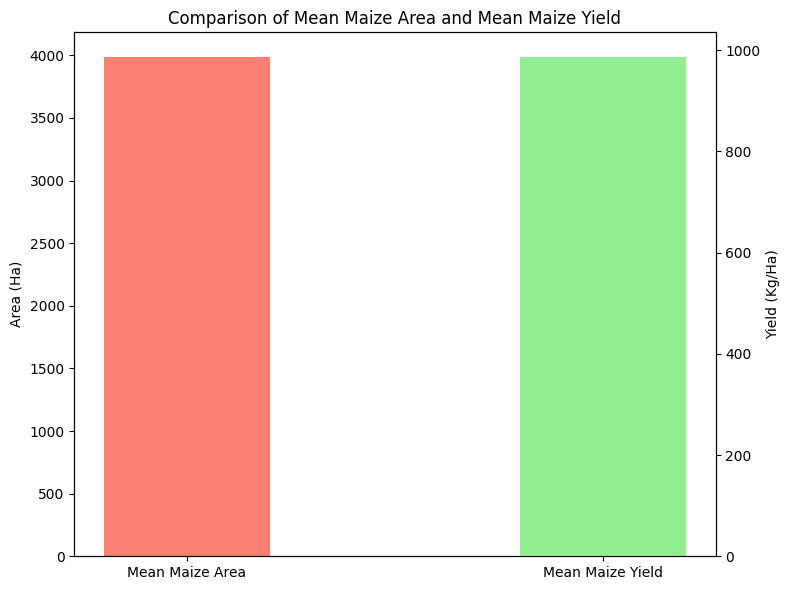

In [287]:
fig, ax1 = plt.subplots(figsize=(8, 6))

labels = ['Mean Maize Area', 'Mean Maize Yield']
means_area = [mean_maizearea]
means_yield = [mean_M_Yield_dist]

# Bar chart for mean maize area on the left y-axis
rects1 = ax1.bar(labels[0], means_area, color='salmon', width=0.4)
ax1.set_ylabel('Area (Ha)')
ax1.set_title('Comparison of Mean Maize Area and Mean Maize Yield')
ax1.tick_params(axis='y')

# Create a second y-axis for mean maize yield
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_yield, color='lightgreen', width=0.4)
ax2.set_ylabel('Yield (Kg/Ha)')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

In [288]:
#correlation of total crop area against total crop yields
corr_disttca_v_disttcy = np.corrcoef(district_crop_yield['total_crop_area'],district_crop_yield['total_yields'])
corr_disttca_v_disttcy[0,1]

np.float64(0.2953194074238365)

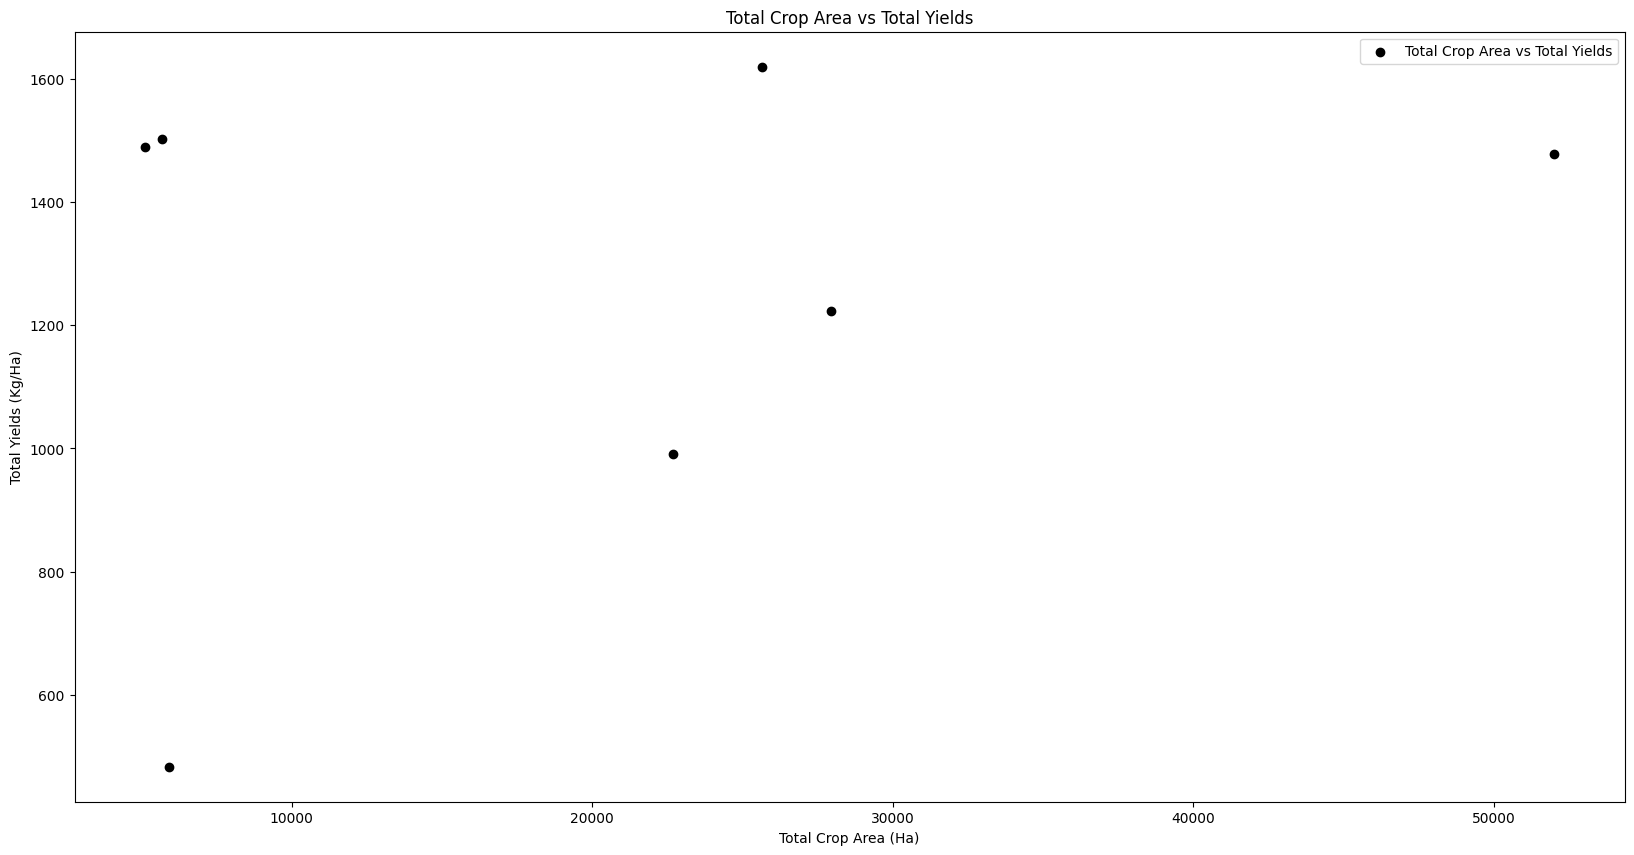

In [289]:
# Scatter plot
plt.scatter(district_crop_yield['total_crop_area'], district_crop_yield['total_yields'], color='black', label='Total Crop Area vs Total Yields')


plt.xlabel('Total Crop Area (Ha)')
plt.ylabel('Total Yields (Kg/Ha)')
plt.title('Total Crop Area vs Total Yields')
plt.legend()
plt.show()

# **CONCLUSION**:
The amount of land allocated to crop growth does indeed affect the total crop yield of the districts, though not greatly, due to the possibility of underlying factors such as soil fertility and climate change in the districts.

In [290]:
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,2.879816e+06
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,5.541496e+06
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,5.714680e+05
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,1.954668e+06
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,4.001549e+06


In [291]:
subcounty_crop_yield.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot', 'Total_Yield'],
      dtype='object')

In [292]:
subcounty_crop_yield.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


**Now we will look into how the Sub-county crop yield relates with certain factors such as population and total area allocated for plant growth.

***Firstly we will check how the total yield of the subcounties relates to the total area allocated to crop growth.***

In [293]:
#Finding the mean of total maize yield
mean_maizesbc_yield = subcounty_crop_yield['M_Yield_Ha'].mean()
mean_maizesbc_yield

np.float64(940.2595522519231)

In [294]:
#Finding mean for total sougham yield
mean_soughamsbc_yield = subcounty_crop_yield['S_Yield_Ha'].mean()
mean_soughamsbc_yield


np.float64(274.16540509807686)

In [295]:
#mean for total crop area
subcounty_crop_yield['total_crop_area']=subcounty_crop_yield['S_Area_Ha']+subcounty_crop_yield['M_Area_Ha']
total_subcounty_croparea = subcounty_crop_yield['total_crop_area']
total_subcounty_croparea.head()

,total_crop_area
0,6962.466678
1,13280.359721
2,1528.883696
3,6807.210613
4,10283.810044


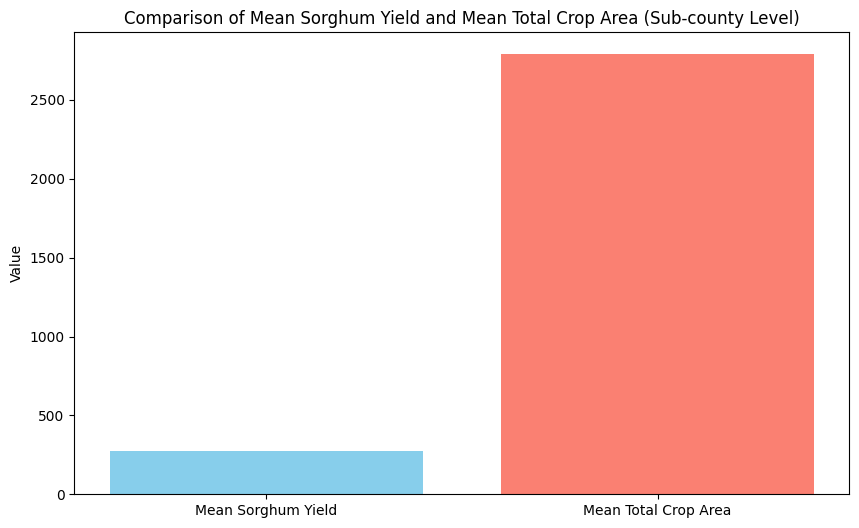

In [296]:
# Create a comparative bar chart of mean sorghum yield and total crop area
mean_total_crop_area = total_subcounty_croparea.mean()

labels = ['Mean Sorghum Yield', 'Mean Total Crop Area']
means = [mean_sougham_yield, mean_total_crop_area]

plt.figure(figsize=(10, 6))
plt.bar(labels, means, color=['skyblue', 'salmon'])
plt.title('Comparison of Mean Sorghum Yield and Mean Total Crop Area (Sub-county Level)')
plt.ylabel('Value')
plt.show()

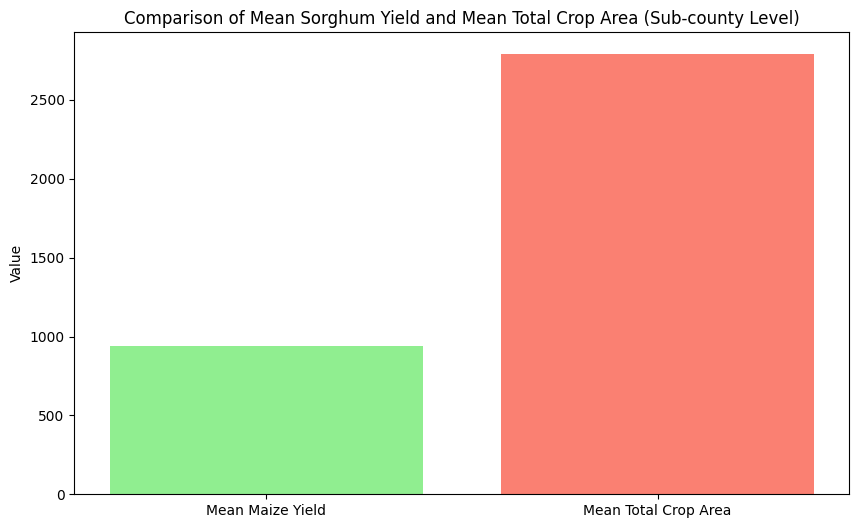

In [297]:
#creating a comparative bar graph to show how sorgham yield realtes to total crop area
mean_total_crop_area = total_subcounty_croparea.mean()

labels = ['Mean Maize Yield', 'Mean Total Crop Area']
means = [mean_maize_yield, mean_total_crop_area]

plt.figure(figsize=(10, 6))
plt.bar(labels, means, color=['lightgreen', 'salmon'])
plt.title('Comparison of Mean Sorghum Yield and Mean Total Crop Area (Sub-county Level)')
plt.ylabel('Value')
plt.show()

As seen in the two bar graphs above, the mean maize and sorghum yields are relatively low compared to the total land area allocated to crop growth.

This may lead to the conclusion that the land is not being well utilised, or other underlying factors, such as drought, are at play.

In [298]:
#finding the correlation between total crop yield and total crop area
subcounty_crop_yield['total_yields']=subcounty_crop_yield['S_Yield_Ha']+subcounty_crop_yield['M_Yield_Ha']
total_subcounty_cropyield = subcounty_crop_yield['total_yields']
corr_tcy_v_tca = np.corrcoef(subcounty_crop_yield['total_yields'],subcounty_crop_yield['total_crop_area'])
corr_tcy_v_tca[0,1]

np.float64(0.254886310419384)

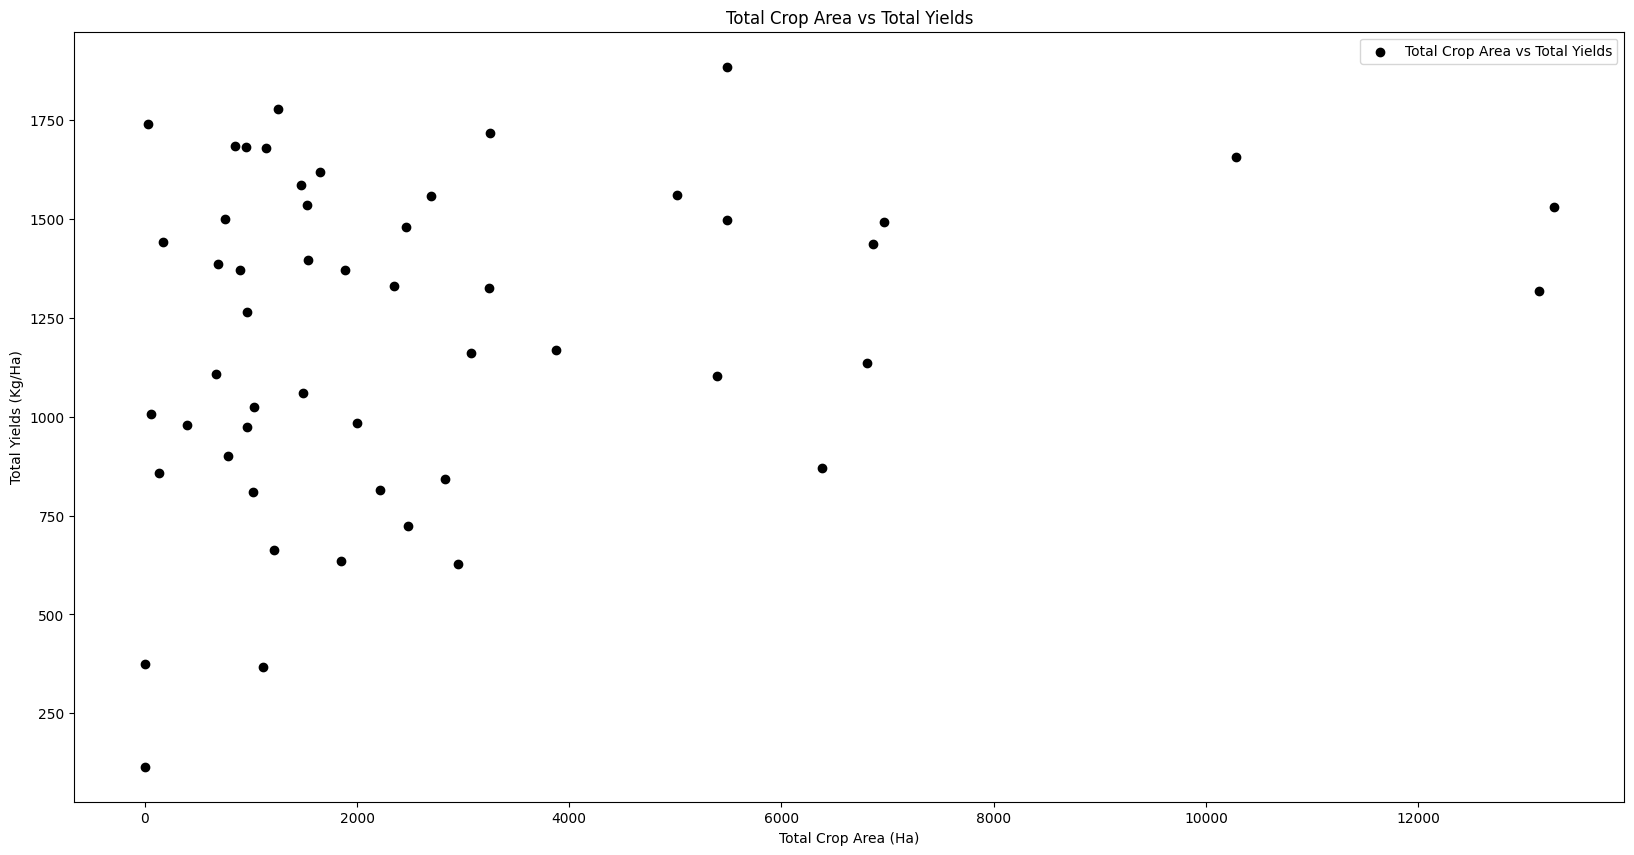

In [299]:
#plotting a scatter plot comparing total crop area to total crop yields
plt.scatter(subcounty_crop_yield['total_crop_area'], subcounty_crop_yield['total_yields'], color='black', label='Total Crop Area vs Total Yields')
plt.xlabel('Total Crop Area (Ha)')
plt.ylabel('Total Yields (Kg/Ha)')
plt.title('Total Crop Area vs Total Yields')
plt.legend()
plt.show()

# **CONCLUSION:**
A higher crop area allocated to the growth of crops does, in fact, affect the sum crop yield of the subcounties.


Now we are going to check how the crop yields relate with the population in the subcounsties

In [300]:
#mean subcounty population
mean_subcounty_population = subcounty_crop_yield['POP'].mean()
mean_subcounty_population

np.float64(28934.69230769231)

In [301]:
#mean maize yield subcounty-wise
mean_maizesbc_yield

np.float64(940.2595522519231)

In [302]:
#mean sorghum yield subcounty-wise
mean_soughamsbc_yield

np.float64(274.16540509807686)

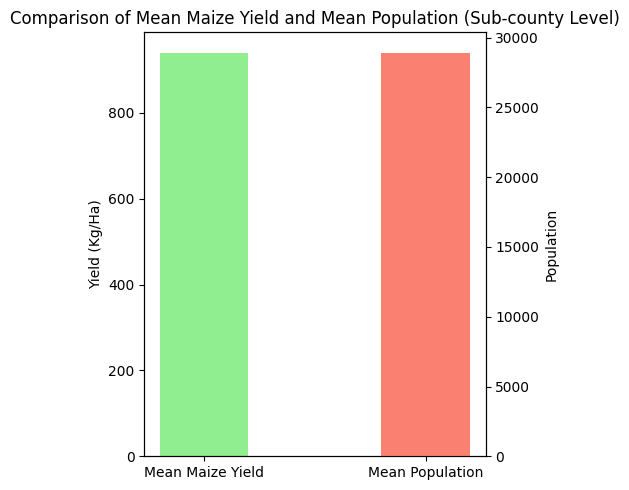

In [303]:
fig, ax1 = plt.subplots(figsize=(5, 5))

labels = ['Mean Maize Yield', 'Mean Population']
means_yield = [mean_maizesbc_yield]
means_pop = [mean_subcounty_population]

# Bar chart for mean maize yield on the left y-axis
rects1 = ax1.bar(labels[0], means_yield, color='lightgreen', width=0.4)
ax1.set_ylabel('Yield (Kg/Ha)')
ax1.set_title('Comparison of Mean Maize Yield and Mean Population (Sub-county Level)')
ax1.tick_params(axis='y')

# Create a second y-axis for mean population
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_pop, color='salmon', width=0.4)
ax2.set_ylabel('Population')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

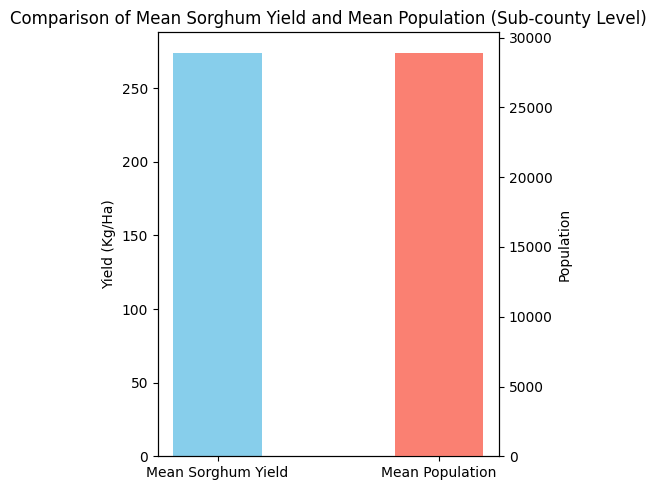

In [304]:
fig, ax1 = plt.subplots(figsize=(5,5))

labels = ['Mean Sorghum Yield', 'Mean Population']
means_yield = [mean_soughamsbc_yield]
means_pop = [mean_subcounty_population]

# Bar chart for mean sorghum yield on the left y-axis
rects1 = ax1.bar(labels[0], means_yield, color='skyblue', width=0.4)
ax1.set_ylabel('Yield (Kg/Ha)')
ax1.set_title('Comparison of Mean Sorghum Yield and Mean Population (Sub-county Level)')
ax1.tick_params(axis='y')

# Create a second y-axis for mean population
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_pop, color='salmon', width=0.4)
ax2.set_ylabel('Population')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

From the two bar graphs above, the conclusion that a majority of the population is comprised of  farmers could be drawn, stemming from the high crop yields compared to the population.

In [305]:
#drawing the total subcounty crop yields
subcounty_crop_yield['total_yields']=subcounty_crop_yield['S_Yield_Ha']+subcounty_crop_yield['M_Yield_Ha']
total_subcounty_cropyield = subcounty_crop_yield['total_yields']
total_subcounty_cropyield.head()

,total_yields
0,1491.674430
1,1530.887210
2,1536.320009
3,1135.691147
4,1657.696807


In [306]:
#correlation between the population and total crop yields subcounty-wise
corr_sbcpop_v_sbctotalcrop=np.corrcoef(subcounty_crop_yield['total_yields'],subcounty_crop_yield['POP'])
corr_sbcpop_v_sbctotalcrop[0,1]

np.float64(0.08389233683963013)

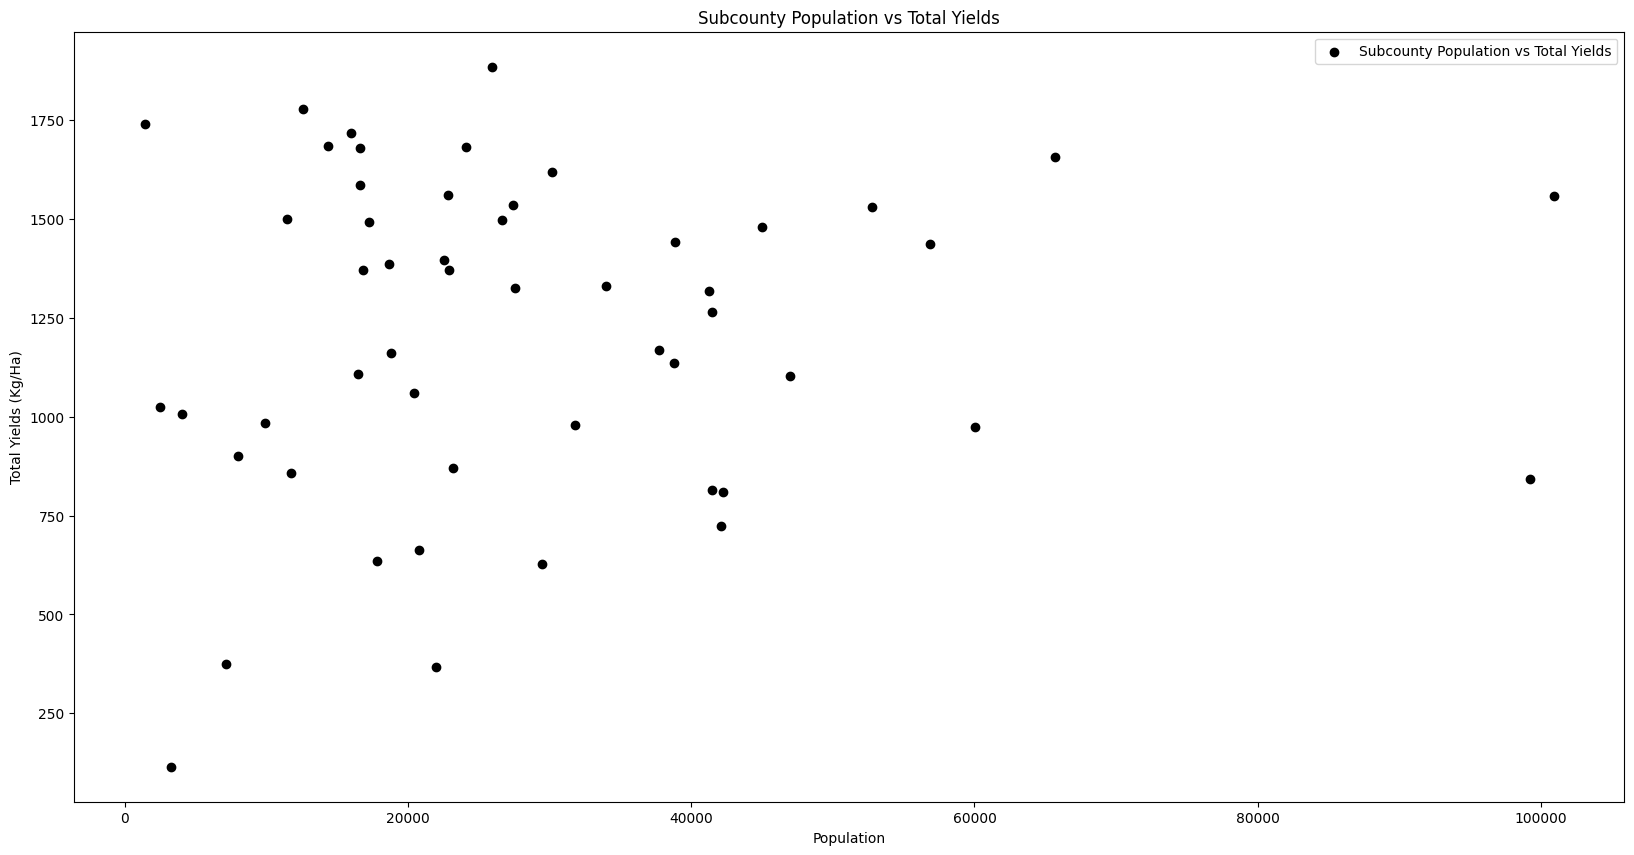

In [307]:
# Scatter plot comparing total subcounty crop yields to the subcounty population
plt.scatter(subcounty_crop_yield['POP'], subcounty_crop_yield['total_yields'], color='black', label='Subcounty Population vs Total Yields')
plt.xlabel('Population')
plt.ylabel('Total Yields (Kg/Ha)')
plt.title('Subcounty Population vs Total Yields')
plt.legend()
plt.show()

# **CONCLUSION**:
From the above scatter plot and correlation calculation,it would be wise to summise that the population has an impact on the average crop yields in the suncounties hence a flactuation in population could adversly affect the quantity of subcounty crop yields.